In [1]:
# Data management
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Graphics
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
%matplotlib inline

# Preprocessing and modelling
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree
from sklearn import metrics

from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from dmba import plotDecisionTree, classificationSummary, regressionSummary


# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
#warnings.filterwarnings('once')
warnings.filterwarnings('ignore')

no display found. Using non-interactive Agg backend


In [2]:
# Data Loading


#training data
data_train = pd.read_csv('https://raw.githubusercontent.com/SantiagoArenas/MachineLearning/main/austinHousingData.csv')
data_train.head()



,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg


In [3]:
# Columnas descartables de inicio
data_train = data_train.drop(["description","homeImage","zpid","streetAddress","latest_saledate","latestPriceSource", 'garageSpaces'], axis=1)
#Cogemos los datos que queremos
data_train = data_train[data_train['city'] == 'austin']
data_train = data_train[data_train['homeType'] == 'Single Family']
#Tiene los mismos valores siempre, entonces no aporta nada
data_train = data_train.drop(["city","homeType"], axis=1)
numeric_cols = data_train.select_dtypes(include=['float64', 'int64']).columns.to_list()
cat_cols = data_train.select_dtypes(include=['object', 'category', 'bool']).columns.to_list()
#Prefijos para las dummies
new_column_names = [
    'Dmy_association',
    'Dmy_cooling',
    'Dmy_garage',
    'Dmy_heating',
    'Dmy_spa',
    'Dmy_view'
]
data=pd.get_dummies(data_train, columns=cat_cols, prefix=new_column_names,drop_first=True, dtype= 'int64' ) 
print(data.dtypes)

zipcode                         int64
latitude                      float64
longitude                     float64
propertyTaxRate               float64
parkingSpaces                   int64
yearBuilt                       int64
latestPrice                   float64
numPriceChanges                 int64
latest_salemonth                int64
latest_saleyear                 int64
numOfPhotos                     int64
numOfAccessibilityFeatures      int64
numOfAppliances                 int64
numOfParkingFeatures            int64
numOfPatioAndPorchFeatures      int64
numOfSecurityFeatures           int64
numOfWaterfrontFeatures         int64
numOfWindowFeatures             int64
numOfCommunityFeatures          int64
lotSizeSqFt                   float64
livingAreaSqFt                float64
numOfPrimarySchools             int64
numOfElementarySchools          int64
numOfMiddleSchools              int64
numOfHighSchools                int64
avgSchoolDistance             float64
avgSchoolRat

In [4]:
# Configuring train and test datasets
# ------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
                                        data.drop(columns = "latestPrice"),
                                        data['latestPrice'],
                                        random_state = 123,
                                        test_size=0.2
                                    )


In [5]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2820 entries, 13700 to 12390
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zipcode                     2820 non-null   int64  
 1   latitude                    2820 non-null   float64
 2   longitude                   2820 non-null   float64
 3   propertyTaxRate             2820 non-null   float64
 4   parkingSpaces               2820 non-null   int64  
 5   yearBuilt                   2820 non-null   int64  
 6   numPriceChanges             2820 non-null   int64  
 7   latest_salemonth            2820 non-null   int64  
 8   latest_saleyear             2820 non-null   int64  
 9   numOfPhotos                 2820 non-null   int64  
 10  numOfAccessibilityFeatures  2820 non-null   int64  
 11  numOfAppliances             2820 non-null   int64  
 12  numOfParkingFeatures        2820 non-null   int64  
 13  numOfPatioAndPorchFeatures  

In [6]:
X_test

,zipcode,latitude,longitude,propertyTaxRate,parkingSpaces,yearBuilt,numPriceChanges,latest_salemonth,latest_saleyear,numOfPhotos,...,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,Dmy_association_True,Dmy_cooling_True,Dmy_garage_True,Dmy_heating_True,Dmy_spa_True,Dmy_view_True
13700,78704,30.255411,-97.771408,1.98,1,2018,6,5,2019,37,...,16,3.0,4,1,0,1,1,1,0,0
14582,78751,30.305277,-97.730148,1.98,0,1909,1,8,2018,40,...,15,4.0,4,3,0,1,0,1,0,1
10511,78745,30.197428,-97.780548,1.98,2,1977,2,9,2020,51,...,14,2.0,3,2,0,1,1,1,0,0
6871,78748,30.181707,-97.811668,1.98,4,1982,1,11,2020,28,...,14,3.0,3,1,0,1,1,1,0,0
1014,78717,30.493683,-97.797577,2.21,2,2011,3,6,2020,30,...,16,3.0,4,2,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5286,78739,30.163673,-97.886322,1.98,2,2018,1,5,2020,41,...,17,3.0,5,1,1,1,1,1,0,1
14362,78731,30.345613,-97.777222,1.98,0,1992,1,7,2018,36,...,16,7.0,6,2,0,1,0,1,1,0
1024,78724,30.280983,-97.628304,1.98,0,2009,2,3,2019,20,...,11,2.0,3,1,1,1,0,1,0,0
4937,78748,30.179537,-97.831848,1.98,0,1984,3,6,2018,10,...,15,2.0,3,2,0,1,0,1,0,0


In [7]:
# Creating the model with decision tree
# ------------------------------------------------------------------------------
model1 = DecisionTreeRegressor(
            max_depth         = 3,
            random_state      = 123
          )
# Model training
# ------------------------------------------------------------------------------
model1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=123)

In [8]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming 'model1' is your decision tree model and 'data_train' is your training data

# Tree created
# ------------------------------------------------------------
fig, ax = plt.subplots(figsize=(12, 5))

print(f"Tree Depth: {model1.get_depth()}")
print(f"Number of leaves or terminal nodes: {model1.get_n_leaves()}")

plot = plot_tree(
    decision_tree=model1,
    feature_names=data_train.drop(columns="latestPrice").columns,
    class_names=None,  # Set to None for regression tasks
    filled=True,
    impurity=False,
    fontsize=10,
    precision=2,
    ax=ax
)

plt.show()


Tree Depth: 3
Number of leaves or terminal nodes: 7


In [9]:
# get the text representation

#text_representation = tree.export_text(model)  # generic features

text_representation = tree.export_text(model1, feature_names= list(data_train.drop(columns = "latestPrice").columns) )



print(text_representation)

|--- numOfPatioAndPorchFeatures <= 4608.00
|   |--- numOfPatioAndPorchFeatures <= 2699.50
|   |   |--- zipcode <= 78711.00
|   |   |   |--- value: [671758.22]
|   |   |--- zipcode >  78711.00
|   |   |   |--- value: [375889.77]
|   |--- numOfPatioAndPorchFeatures >  2699.50
|   |   |--- zipcode <= 78711.00
|   |   |   |--- value: [1500851.50]
|   |   |--- zipcode >  78711.00
|   |   |   |--- value: [660892.01]
|--- numOfPatioAndPorchFeatures >  4608.00
|   |--- numOfParkingFeatures <= 643816.78
|   |   |--- numOfPatioAndPorchFeatures <= 6043.50
|   |   |   |--- value: [1617133.94]
|   |   |--- numOfPatioAndPorchFeatures >  6043.50
|   |   |   |--- value: [2907187.99]
|   |--- numOfParkingFeatures >  643816.78
|   |   |--- value: [13500000.00]



In [10]:
# Model training error
#-------------------------------------------------------------------------------
prediction_train = model1.predict(X = X_train)


#Measuring Goodness of fit in Training data

print('R2 Value in training:', round(metrics.r2_score(y_train, prediction_train),2))

#Measuring accuracy on Testing Data
print('Accuracy in training',round( 100- (np.mean(np.abs((y_train - prediction_train) / y_train)) * 100), 2))
      
 
residuals_train=y_train - prediction_train


R2 Value in training: 0.52
Accuracy in training 55.26


In [11]:
# Model test error
#-------------------------------------------------------------------------------
prediction_test = model1.predict(X = X_test)


#Measuring accuracy on Testing Data
print('Accuracy in test',round( 100- (np.mean(np.abs((y_test - prediction_test) / y_test)) * 100), 2))
      
 
residuals_test=y_test - prediction_test

Accuracy in test 47.35


In [12]:
print("Importance of predictors ")
print("-------------------------------------------")
importance_predictors = pd.DataFrame(
                            {'predictor': list(data_train.drop(columns = "latestPrice").columns),
                             'importance': model1.feature_importances_}
                            )
importance_predictors.sort_values('importance', ascending=False)


Importance of predictors 
-------------------------------------------


,predictor,importance
19,numOfPatioAndPorchFeatures,0.746771
0,zipcode,0.147362
18,numOfParkingFeatures,0.105867
3,propertyTaxRate,0.000000
28,numOfMiddleSchools,0.000000
22,numOfWindowFeatures,0.000000
23,numOfCommunityFeatures,0.000000
24,lotSizeSqFt,0.000000
25,livingAreaSqFt,0.000000
26,numOfPrimarySchools,0.000000


In [13]:
# Analyzing Pruning
#-------------------------


#SEVERAL METHODS ARE PROPOSED BELOW



In [14]:
# Common-sense selection of alpha based on cost-complexity values
#Obtaining diferent options of alpha values

path = model1.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [15]:
path

{'ccp_alphas': array([0.00000000e+00, 5.65634213e+09, 8.19667914e+09, 1.07491579e+10,
        1.17859370e+10, 1.75985157e+10, 5.73413335e+10]),
 'impurities': array([1.00961548e+11, 1.06617890e+11, 1.14814569e+11, 1.25563727e+11,
        1.37349664e+11, 1.54948180e+11, 2.12289514e+11])}

In [16]:
# Representation Impurity vs effective alpha for training set

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

In [17]:
# Different alpha options are tried
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 3 with ccp_alpha: 57341333498.036835


In [18]:
# we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node
# This is not classification

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots( 2, 1, figsize=(10,10))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [19]:
# Cheking scores in training and test datasets for different alphas

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [20]:
# the scores obtained are now printed and ordered by the best test score

eva_df = pd.DataFrame({'ccp_alphas': ccp_alphas, 'train_scores': train_scores, 'test_scores': test_scores})
eva_df = eva_df.sort_values(['test_scores'], ascending = False)
eva_df.head(10)

,ccp_alphas,train_scores,test_scores
1,5.656342e+09,0.524416,0.561576
2,8.196679e+09,0.459160,0.445967
3,1.074916e+10,0.408526,0.387210
4,1.178594e+10,0.353008,0.383038
5,1.759852e+10,0.353008,0.383038
0,0.000000e+00,1.000000,0.325939


In [21]:
# Obtaining the best alpha from the previous list
best_alpha= eva_df.iloc[0][0]

best_alpha


5656342129.613064

In [22]:
# fit the pruned tree with best alpha
import pydotplus
from dmba import plotDecisionTree, classificationSummary, regressionSummary

prunedtree_I = DecisionTreeRegressor(ccp_alpha=best_alpha, random_state=0)

prunedtree_I.fit(X_train, y_train)


#classificationSummary(y_train, prunedtree_I.predict(X_train_prep))
#classificationSummary(y_test, prunedtree_I.predict(X_test_prep))

DecisionTreeRegressor(ccp_alpha=5656342129.613064, random_state=0)

Tree Depth: 3
Number of terminal nodes: 7


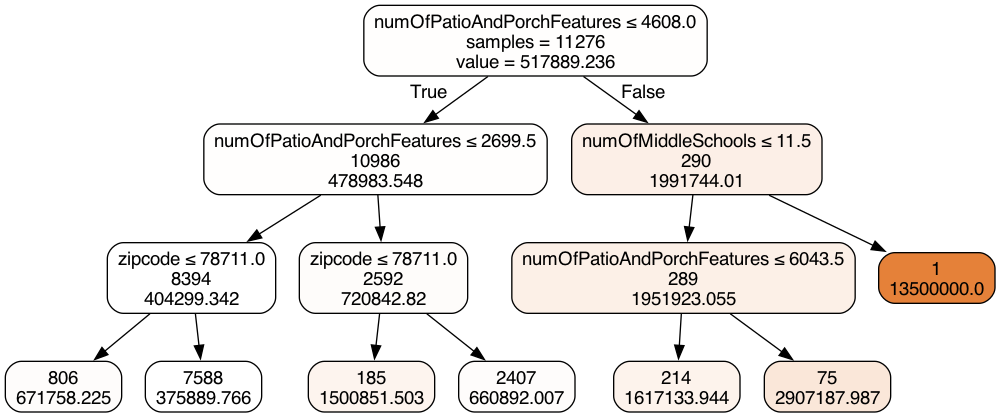

In [23]:
print(f"Tree Depth: {prunedtree_I.get_depth()}")
print(f"Number of terminal nodes: {prunedtree_I.get_n_leaves()}")
plotDecisionTree(prunedtree_I, feature_names=list(data_train.drop(columns = "latestPrice").columns))

In [24]:
# Model training error
#-------------------------------------------------------------------------------
prediction_train = prunedtree_I.predict(X = X_train)


#Measuring Goodness of fit in Training data

print('R2 Value in training:', round(metrics.r2_score(y_train, prediction_train),2))

#Measuring accuracy on Testing Data
print('Accuracy in training',round( 100- (np.mean(np.abs((y_train - prediction_train) / y_train)) * 100), 2))
      
 
residuals_train=y_train - prediction_train


R2 Value in training: 0.52
Accuracy in training 55.26


In [25]:
# Model test error
#-------------------------------------------------------------------------------
prediction_test = prunedtree_I.predict(X = X_test)


#Measuring accuracy on Testing Data
print('Accuracy in test',round( 100- (np.mean(np.abs((y_test - prediction_test) / y_test)) * 100), 2))
      
 
residuals_testn=y_test - prediction_test

Accuracy in test 47.35


In [26]:
#  II.  Alternative method using GridSearchCV to fine tune method parameters
#----------------------------------------------------------------------

In [27]:
# Start with an initial guess for parameters
param_grid = {
    'max_depth':[5,10,20,],
    'min_samples_split':[20,40,60,80],
    'min_impurity_decrease': [0.0001, 0.0005, 0.001, 0.005, 0.01]
}

gridSearch = GridSearchCV(DecisionTreeRegressor(random_state=1), param_grid, cv=10, n_jobs=1)
gridSearch.fit(X_train, y_train)

print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

Initial score:  0.5779281958407869
Initial parameters:  {'max_depth': 20, 'min_impurity_decrease': 0.0001, 'min_samples_split': 40}


In [28]:
# Adapt grid based on result from initial grid search
param_grid = {
 'max_depth': list(range(2,7)), 
 'min_samples_split': list(range(35, 45)), 
 'min_impurity_decrease': [x/10000 for x in range(1, 900, 100)], 
}
gridSearch = GridSearchCV(DecisionTreeRegressor(random_state=1), param_grid, cv=10, n_jobs=-1)
gridSearch.fit(X_train, y_train)

print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)
bestClassTree = gridSearch.best_estimator_

Improved score:  0.5186832766038747
Improved parameters:  {'max_depth': 6, 'min_impurity_decrease': 0.0001, 'min_samples_split': 41}


In [29]:
# fit the final model with best parameters: {'max_depth': 5, 'min_impurity_decrease': 0.0001, 'min_samples_split': 41}

# prunedtree = gridSearch.best_estimator_
# or:
prunedtree_II = DecisionTreeRegressor(random_state = 1, max_depth=5, min_impurity_decrease=0.0001, min_samples_split=41)
prunedtree_II.fit(X_train, y_train)



DecisionTreeRegressor(max_depth=5, min_impurity_decrease=0.0001,
                      min_samples_split=41, random_state=1)

Tree Depth: 5
Number of terminal nodes: 23


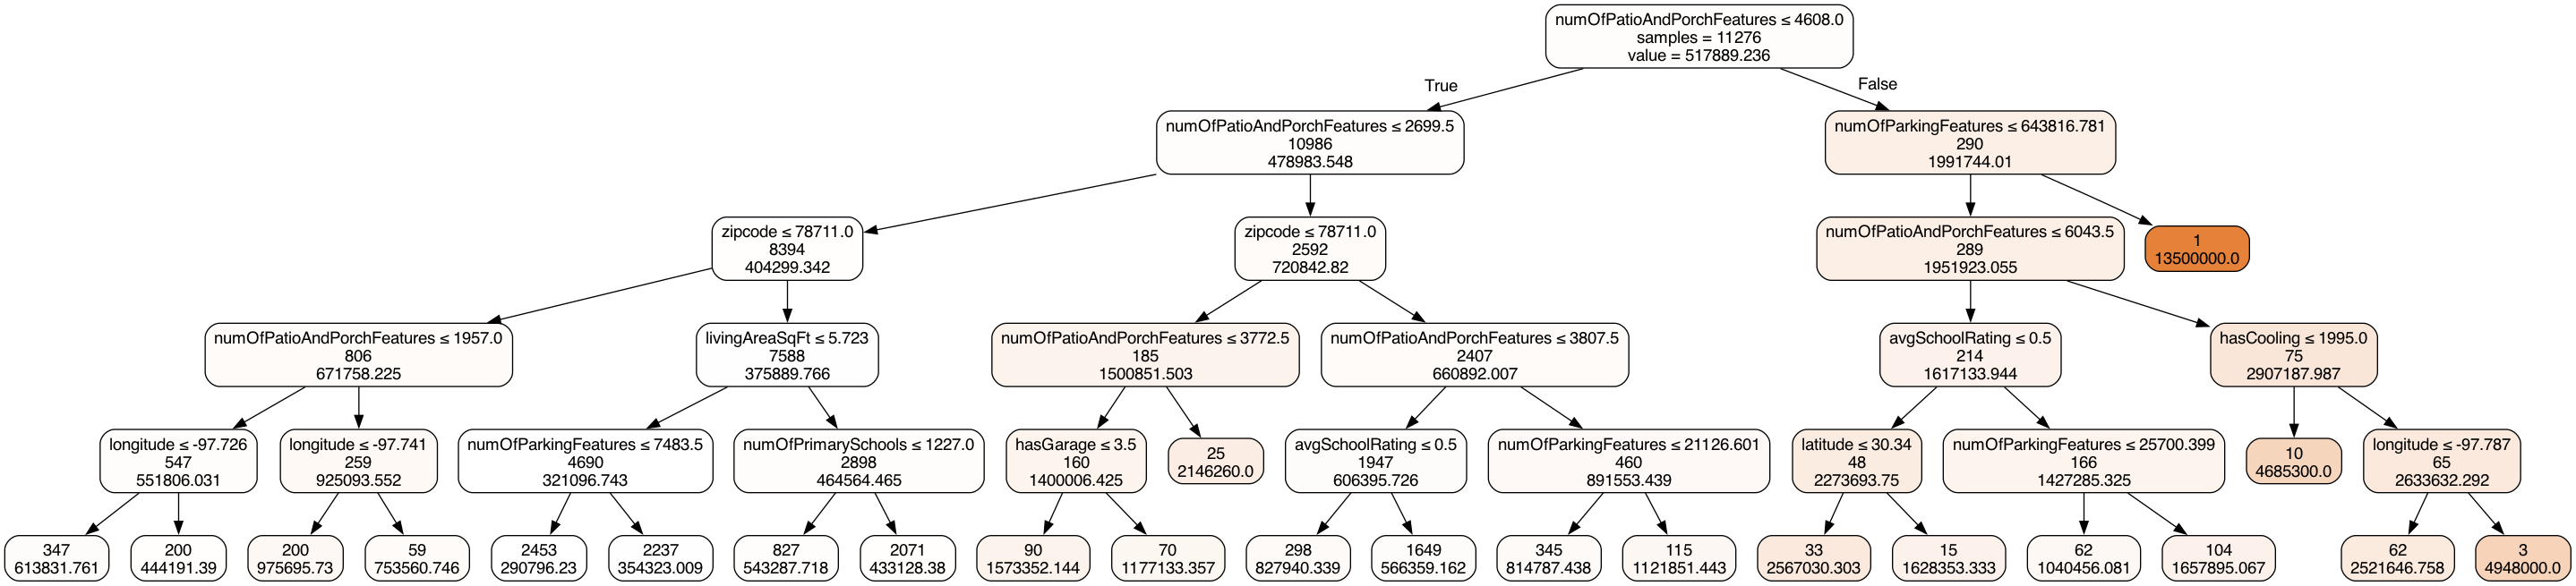

In [30]:
# Pruned tree  Method II
print(f"Tree Depth: {prunedtree_II.get_depth()}")
print(f"Number of terminal nodes: {prunedtree_II.get_n_leaves()}")
plotDecisionTree(prunedtree_II, feature_names=list(data_train.drop(columns = "latestPrice").columns))

In [31]:
# Model training error
#-------------------------------------------------------------------------------
prediction_train = prunedtree_II.predict(X = X_train)


#Measuring Goodness of fit in Training data

print('R2 Value in training:', round(metrics.r2_score(y_train, prediction_train),2))

#Measuring accuracy on Testing Data
print('Accuracy in training',round( 100- (np.mean(np.abs((y_train - prediction_train) / y_train)) * 100), 2))
      
 
residuals_train=y_train - prediction_train

# Model test error
#-------------------------------------------------------------------------------
prediction_test = prunedtree_II.predict(X = X_test)


#Measuring accuracy on Testing Data
print('Accuracy in test',round( 100- (np.mean(np.abs((y_test - prediction_test) / y_test)) * 100), 2))
      
 
residuals_testn=y_test - prediction_test

R2 Value in training: 0.63
Accuracy in training 64.19
Accuracy in test 50.8


In [32]:
# METHOD:  prune the tree with cost complexity pruning - Cross Validation

In [33]:
from sklearn.model_selection import cross_val_score

# fit the tree
fulltree = DecisionTreeRegressor(random_state=2)
fulltree.fit(X_train, y_train)


path = fulltree.cost_complexity_pruning_path(X_train, y_train)
alphas, impurities = path.ccp_alphas, path.impurities

mean, std = [], []
for i in alphas:
    tree = DecisionTreeRegressor(ccp_alpha=i, random_state=0)
#     cross validation for each alpha value
    scores = cross_val_score(tree, X_train, y_train, cv=5)
    mean.append(scores.mean())
    std.append(scores.std())
# keep a record of the values of alpha, mean, standard deviation
eva_df = pd.DataFrame({'alpha': alphas, 'mean': mean, 'std': std})
eva_df = eva_df.sort_values(['mean'], ascending = False)
eva_df.head(10)

KeyboardInterrupt: 

In [ ]:
# fit the pruned tree - cv
prunedtree_cv = DecisionTreeRegressor(ccp_alpha=eva_df.iloc[0, 0], random_state=0)
prunedtree_cv.fit(X_train, y_train)



DecisionTreeRegressor(ccp_alpha=2.4528217112703885, random_state=0)

Tree Depth: 4
Number of terminal nodes: 6


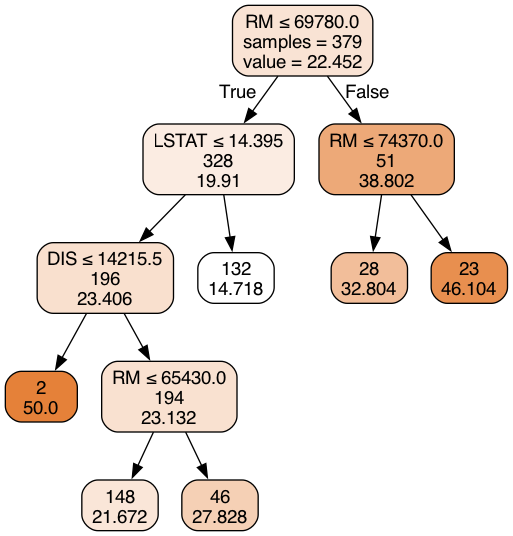

In [ ]:
# Pruned tree  Method II
print(f"Tree Depth: {prunedtree_cv.get_depth()}")
print(f"Number of terminal nodes: {prunedtree_cv.get_n_leaves()}")
plotDecisionTree(prunedtree_cv, feature_names=list(data_train.drop(columns = "latestPrice").columns))

In [ ]:
# Model training error
#-------------------------------------------------------------------------------
prediction_train = prunedtree_cv.predict(X = X_train)


#Measuring Goodness of fit in Training data

print('R2 Value in training:', round(metrics.r2_score(y_train, prediction_train),2))

#Measuring accuracy on Testing Data
print('Accuracy in training',round( 100- (np.mean(np.abs((y_train - prediction_train) / y_train)) * 100), 2))
      
 
residuals_train=y_train - prediction_train

# Model test error
#-------------------------------------------------------------------------------
prediction_test = prunedtree_cv.predict(X = X_test)


#Measuring accuracy on Testing Data
print('Accuracy in test',round( 100- (np.mean(np.abs((y_test - prediction_test) / y_test)) * 100), 2))
      
 
residuals_testn=y_test - prediction_test

R2 Value in training: 0.82
Accuracy in training 82.44
Accuracy in test 82.29


In [36]:
len(alphas)

10227

In [34]:
# IV METHOD: Tree pruning without cross validation
accuracy_train, accuracy_val = [], []
clfs = []
    
for i in alphas:
    tree = DecisionTreeRegressor(ccp_alpha=i, random_state=0)
    tree.fit(X_train, y_train)
    clfs.append(tree)
    
    train_y_pred = tree.predict(X_train)
    val_y_pred = tree.predict(X_test)
    accuracy_train.append(round( 100- (np.mean(np.abs((y_train - train_y_pred) / y_train)) * 100), 2))
    accuracy_val.append(round( 100- (np.mean(np.abs((y_test - val_y_pred) / y_test)) * 100), 2))

sns.set()
plt.figure(figsize=(13, 6))
sns.lineplot(y = accuracy_train, x = alphas, label = 'Train Accuracy')
sns.lineplot(y = accuracy_val, x = alphas, label = 'Validation Accuracy')
plt.xticks(ticks = np.arange(0, 45, 1), rotation = 45)
plt.show()

KeyboardInterrupt: 

In [ ]:
# We observe the results 
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

eva_df2 = pd.DataFrame({'alpha': alphas, 'node_counts':node_counts, 'depth': depth,
                       'acc_train':accuracy_train, 'acc_val':accuracy_val,
                      'acc_diff': np.array(accuracy_train) - np.array(accuracy_val)})
eva_df2.sort_values(by = ['acc_val', 'node_counts'], ascending = False).iloc[:10,:]

,alpha,node_counts,depth,acc_train,acc_val,acc_diff
327,0.345239,33,6,88.56,84.27,4.29
328,0.390599,33,6,88.56,84.27,4.29
329,0.429338,29,6,87.33,84.23,3.10
330,0.456775,29,6,87.33,84.23,3.10
331,0.479192,25,5,87.11,84.01,3.10
326,0.295521,35,6,88.68,83.93,4.75
332,0.563472,23,5,86.58,83.74,2.84
333,0.578640,23,5,86.58,83.74,2.84
324,0.248676,39,7,89.09,83.28,5.81
325,0.280211,39,7,89.09,83.28,5.81


In [ ]:
# fit the pruned tree - non cv
# Selecting case with minimum difference value 

prunedtree_IV = DecisionTreeRegressor(ccp_alpha=eva_df2.iloc[332, 0], random_state=0)
prunedtree_IV.fit(X_train, y_train)



DecisionTreeRegressor(ccp_alpha=0.5634720574184411, random_state=0)

In [ ]:
# Model training error
#-------------------------------------------------------------------------------
prediction_train = prunedtree_IV.predict(X = X_train)


#Measuring Goodness of fit in Training data

print('R2 Value in training:', round(metrics.r2_score(y_train, prediction_train),2))

#Measuring accuracy on Testing Data
print('Accuracy in training',round( 100- (np.mean(np.abs((y_train - prediction_train) / y_train)) * 100), 2))
      
 
residuals_train=y_train - prediction_train

# Model test error
#-------------------------------------------------------------------------------
prediction_test = prunedtree_IV.predict(X = X_test)


#Measuring accuracy on Testing Data
print('Accuracy in test',round( 100- (np.mean(np.abs((y_test - prediction_test) / y_test)) * 100), 2))
      
 
residuals_testn=y_test - prediction_test

R2 Value in training: 0.89
Accuracy in training 86.58
Accuracy in test 83.74


Tree Depth: 5
Number of terminal nodes: 12


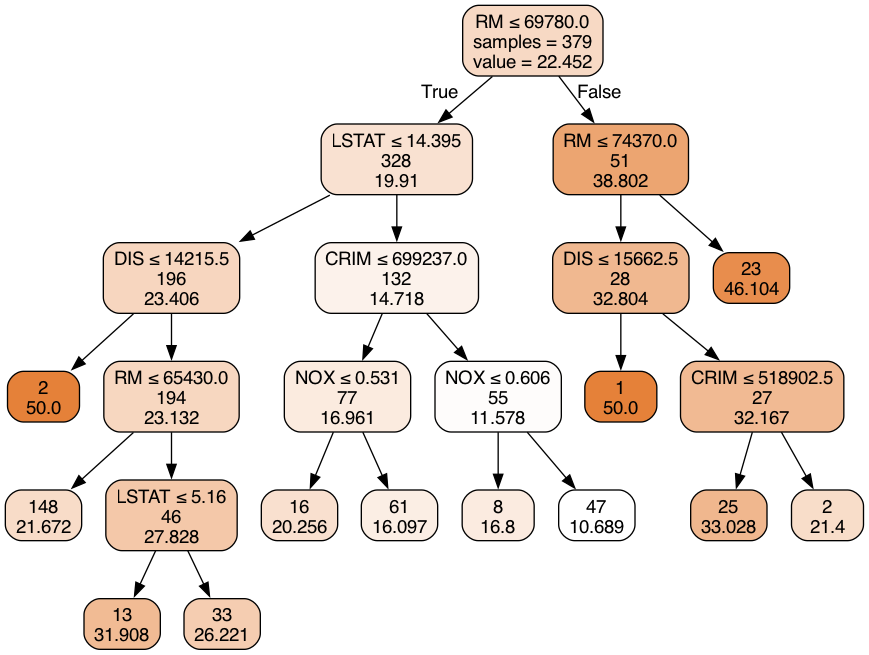

In [ ]:
# Final pruned tree
# ------------------------------------------------------------------------------
#model_final = grid.best_estimator_
print(f"Tree Depth: {prunedtree_IV.get_depth()}")
print(f"Number of terminal nodes: {prunedtree_IV.get_n_leaves()}")
# Implementation
# By comparing the accuracy results from the  evaluations, the last one is selected

plotDecisionTree(prunedtree_IV, feature_names = X_train.columns)

In [ ]:
print("Importance of predictors ")
print("-------------------------------------------")
importance_predictors = pd.DataFrame(
                            {'predictor': list(data_train.drop(columns = "latestPrice").columns),
                             'importance': prunedtree_IV.feature_importances_}
                            )
importance_predictors.sort_values('importance', ascending=False)

Importance of predictors 
-------------------------------------------


,predictor,importance
5,RM,0.666964
12,LSTAT,0.215978
7,DIS,0.059930
0,CRIM,0.040742
4,NOX,0.016386
1,ZN,0.000000
2,INDUS,0.000000
3,CHAS,0.000000
6,AGE,0.000000
8,RAD,0.000000


In [ ]:
# Graphics
# ============================================
import seaborn as sns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 8))

residuals_train=y_train - prediction_train

axes[0, 0].scatter(y_train, prediction_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Predicted Value vs Real Value TEST CASE', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Prediction')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_test))), residuals_test,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Model residuals TRAIN Case', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Error')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuals_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribution of model residuals TRAIN CASE', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Error")
axes[1, 0].tick_params(labelsize = 7)




axes[1, 1].scatter(prediction_train, residuals_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[1, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[1, 1].set_title('Model residuals vs prediction TRAIN Case', fontsize = 10, fontweight = "bold")
axes[1, 1].set_xlabel('Prediction')
axes[1, 1].set_ylabel('Error')
axes[1, 1].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
#fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Disgnosis of errors TRAIN Case', fontsize = 12, fontweight = "bold");

In [ ]:
# Mean Squared Error - Training

from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, prediction_train)
print('MSE in train',round(mean_squared_error(y_train, prediction_train),4))

MSE in train 9.8103


In [ ]:
# Graphics
# ============================================
import seaborn as sns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 8))

residuals_test=y_test - prediction_test

axes[0, 0].scatter(y_test, prediction_test, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Predicted Value vs Real Value TEST CASE', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Prediction')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_test))), residuals_test,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Model residuals TEST Case', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Error')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuals_test,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribution of model residuals TEST CASE', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Error")
axes[1, 0].tick_params(labelsize = 7)




axes[1, 1].scatter(prediction_test, residuals_test,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[1, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[1, 1].set_title('Model residuals vs prediction TEST Case', fontsize = 10, fontweight = "bold")
axes[1, 1].set_xlabel('Prediction')
axes[1, 1].set_ylabel('Error')
axes[1, 1].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
#fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Disgnosis of errors TEST Case', fontsize = 12, fontweight = "bold");

In [ ]:
# Mean Squared Error - Test

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, prediction_test)
print('MSE in test',round(mean_squared_error(y_test, prediction_test),4))

MSE in test 36.4742


In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 9))


x_axis=list(range(len(y_train)))

ax.scatter(x_axis, y_train, color = 'tab:red', label='Real')
ax.scatter(x_axis, prediction_train, color = 'tab:blue', label='Predicted')
ax.set_xlabel("Cases", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("Corriente A")
ax.set_title('Train evaluation MEV', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:purple'})
ax.legend(loc = 'upper left')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 9))


x_axis=list(range(len(y_test)))

ax.scatter(x_axis, y_test, color = 'tab:red', label='Real')
ax.scatter(x_axis, prediction_test, color = 'tab:blue', label='Predicted')
ax.set_xlabel("Cases", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("Corriente A")
ax.set_title('Test evaluation MEV', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:purple'})
ax.legend(loc = 'upper left')
plt.show()

In [ ]:
#######  TRAIN

fig, ax = plt.subplots(figsize=(15, 9))


#x_axis=list(range(len(y_train)))

ax.scatter(y_train, y_train, color = 'tab:red', label='Real')
ax.scatter(y_train, prediction_train, color = 'tab:blue', label='Predicted')
ax.set_xlabel("latestPrice real", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("latestPrice predicted")
ax.set_title(' Train error observed between real and predicted values', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:purple'})
ax.legend(loc = 'upper left')
plt.show()

In [ ]:
#######  TEST

fig, ax = plt.subplots(figsize=(15, 9))


#x_axis=list(range(len(y_train)))

ax.scatter(y_test, y_test, color = 'tab:red', label='Real')
ax.scatter(y_test, prediction_test, color = 'tab:blue', label='Predicted')
ax.set_xlabel("latestPrice real", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("latestPrice predicted")
ax.set_title(' Test error observed between real and predicted values', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:purple'})
ax.legend(loc = 'upper left')
plt.show()